# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #시각화 1
import seaborn as sns #시각화 2
import os as os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
seed = 26 #시드값
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Reading Datasets
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIFrenz_Season1_dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIFrenz_Season1_dataset/test.csv')
test.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,0.0,199.6,0.0,36.0,1.1,0.0,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,0.0,194.0,0.0,127.7,0.6,0.0,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,0.0,172.9,0.0,59.0,0.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,252.9,0.0,153.5,0.0,54.9,0.4,0.0,94.4,0.0,1000.1,1007.4,0.0,0.0,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.0,185.0,0.0,85.8,61.2,0.0
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,238.2,0.0,173.8,0.0,48.8,0.8,0.0,95.7,0.0,1000.2,1007.3,0.0,0.0,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.0,162.8,0.0,87.3,61.7,0.0


In [3]:
all_data = pd.concat([train, test], sort=False)
#Shape checking out
train.shape, test.shape
all_data.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [4]:
#Checking Missing Values for Dependent Variable
print('Y18 count: {}'.format(train['Y18'].count()))
print('Y18 not null count(pct): {:.2f}%'.format(train['Y18'].count() / len(train) * 100))

Y18 count: 432
Y18 not null count(pct): 9.09%


In [5]:
#Creating Missing Value Table for all columns
total = train.isnull().sum()
percent = (train.isnull().sum() / train.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by='Percent', ascending=False).head(39)

,Total,Percent
Y18,4320,90.909091
Y09,432,9.090909
Y00,432,9.090909
Y01,432,9.090909
Y02,432,9.090909
Y03,432,9.090909
Y05,432,9.090909
Y06,432,9.090909
Y07,432,9.090909
Y08,432,9.090909


In [0]:
#Variable Group Compositions
temperature_name = ["X00","X07","X28","X31","X32"] #기온(group_1)
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압(group_2)
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량(group_4)
press_name       = ["X05","X08","X09","X23","X33"] #해면기압(group_5)
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량(group_6)
humidity_name    = ["X12","X20","X30","X37","X38"] #습도(group_7)
direction_name   = ["X13","X15","X17","X25","X35"] #풍향(group_8)

# EDA

In [0]:
#Defining Plotting Functions
##Box plot function for variable groups
def show_plot(col_group):
    plt.plot(all_data[col_group])
    plt.show()
    sns.boxplot(x='variable', y='value', data=pd.melt(all_data[col_group]))
    plt.show()

##KDE plot function for variable groups
def kde_plot(col_group):
    for col in col_group:
        sns.kdeplot(all_data[col], kernel='epa')
    plt.show()

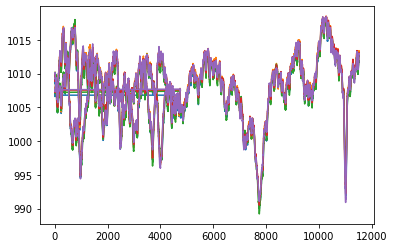

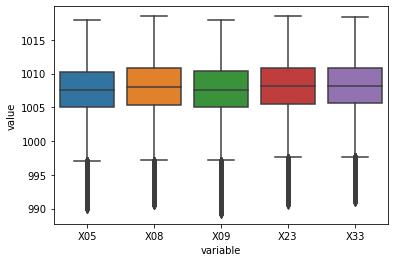

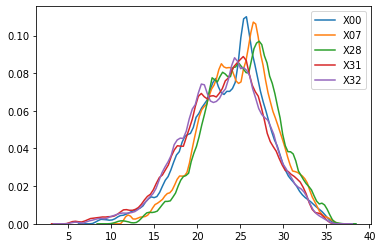

In [9]:
show_plot(press_name)
kde_plot(temperature_name)

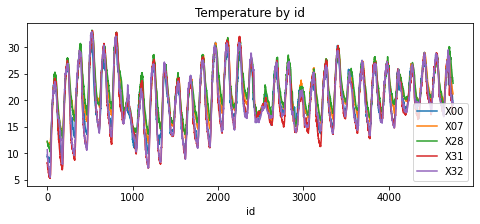

In [10]:
# Comparing values by id within the groups - temperature
train.plot(x='id', y=temperature_name, figsize = (8, 3), title = "Temperature by id")
# 시사점1: id(시간)의 주기별로 업앤다운이 있다.
# 그 주기는 144개 id 주기. 이것은 하루(24시간*60분=1440분)를 10분으로 나눈 결과. 144개 구간
# 시사점2: x00, x07, x28, x31, x32들은 큰 차이 없이 비슷함. 이들의 평균값을 쓰든 한개만 쓰든 하자.

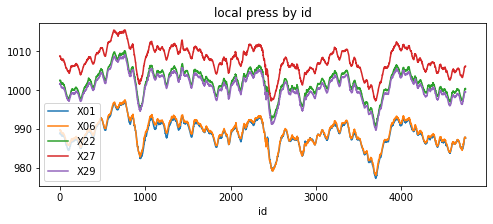

In [11]:
# Comparing values by id within the groups - local pressure
#현지 기압 패턴 파악 - 비가 오는 날, 기압이 유난히 떨어짐을 알 수 있음
train.plot(x='id', y=localpress_name, figsize = (8, 3), title = "local press by id")


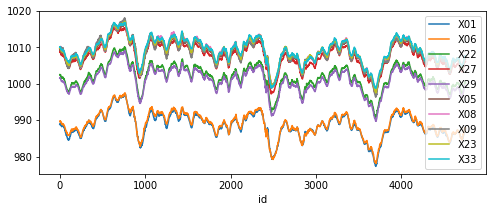

In [12]:
#What's the difference between 현지기압 & 해면기압?
train.plot(x='id', y=["X01","X06","X22","X27","X29","X05","X08","X09","X23","X33"], figsize=(8,3))
#해면기압이 더 높고 해면기압끼리는 차이가 별로 없음

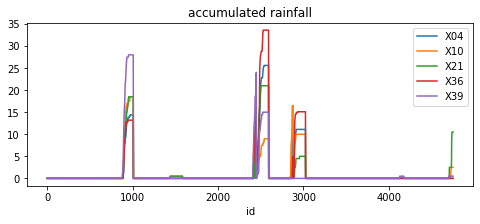

In [0]:
#누적 강수량 파악하기
train.plot(x='id', y=water_name, figsize=(8,3), title="accumulated rainfall")
#비오면 기압도 떨어지고, 기온도 떨어지는 경향

In [0]:
#풍속 파악하기
train.plot(x='id', y=speed_name, figsize=(50,30), title="windspeed")
#대체로 풍속은 X18>X02>X26>X03>X24의 경향(초록>파랑>보라>주황>빨강)
#풍속은 지역별로 다르며 하루하루마다 주기성을 보임

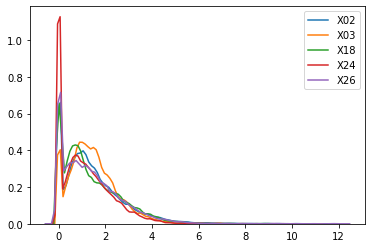

In [0]:
kde_plot(speed_name) #X02 또는 X26으로 사용

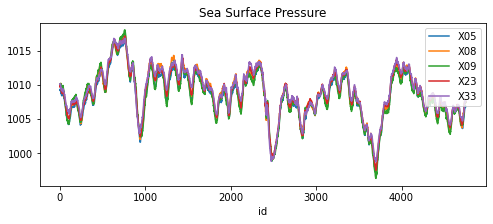

In [0]:
#해면 기압
train.plot(x='id', y=press_name, figsize=(8,3), title="Sea Surface Pressure")
#해면기압과 현지기압은 동일한 패턴을 보임. 현지기압과 positive correlation을 보여

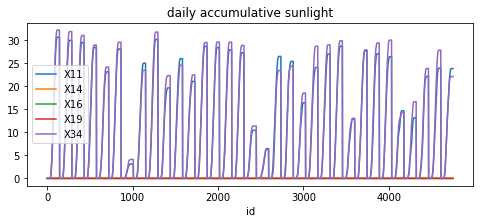

In [0]:
#일일 누적 일사량
train.plot(x='id', y=sun_name, figsize=(8,3), title="daily accumulative sunlight")
#흥미로운 발견. X34와 X11은 일사량이 있으나, 나머지 지역은 보이지 않음
#X34와 X11은 야외에 설치된 센서이나, 결측값이 많음
#X14, X16, X19는 실내에 설치된건가? X14, X16, X19는 햇빛에 관한 정보가 전무함.
#X14, X16, X19 변수는 버리고 X34와 X11만 사용할 것을 고려

In [0]:
train.plot(x='id', y=["X14", "X16", "X19"], figsize=(8,3), title="daily accumulative sunlight")

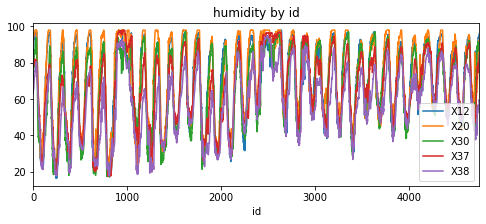

In [0]:
#습도 - 명확히 일별 주기성을 띔.
train.plot(x='id', y=humidity_name, figsize=(8,3), title="humidity by id")

지역별로 보았을 때, X20 > X30 > X37 > X38 로 습도가 높음

=> 해수면과 가까운 정도가 X20이 바다에 가깝고, X38로 갈수록 육지에 가깝다는 예측 가능.

습도를 통해 더 의미를 추출하기 위해서는 id별이 아니라, day별로 파악해야 할 필요 있을듯.

,X13,X15,X17,X25,X35
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,161.357639,174.346654,161.823864,139.524453,208.400505
std,98.787460,97.785811,115.943382,131.438036,99.580562
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.225000,115.600000,33.875000,0.000000,155.300000
50%,182.600000,170.250000,190.450000,134.150000,240.850000
75%,228.925000,258.400000,253.125000,270.900000,277.800000
max,360.000000,359.900000,360.000000,359.900000,359.900000


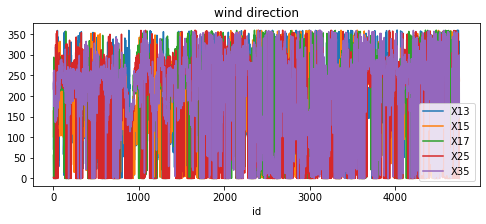

In [13]:
#풍향
train.plot(x='id', y=direction_name, figsize=(8,3), title="wind direction")
#전혀 알 수가 없음=> 4개의 카테고리로 나눌 것.
train[direction_name].describe()

In [0]:
train['X17']

In [0]:
north_wind = (train['X17']>315) | (train['X17']<=45)
east_wind = (train['X17']>45) & (train['X17']<=135)
south_wind = (train['X17']>135) & (train['X17']<=225)
west_wind = (train['X17']>225) & (train['X17']<=315)

train.loc[north_wind, 'wind_direction'] = 'North'
train.loc[east_wind, 'wind_direction'] = 'East'
train.loc[south_wind, 'wind_direction'] = 'South'
train.loc[west_wind, 'wind_direction'] = 'West'

In [15]:
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,wind_direction
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN,East
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN,North
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN,North
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN,West
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN,North


In [0]:
north_wind = (test['X17']>315) | (test['X17']<=45)
east_wind = (test['X17']>45) & (test['X17']<=135)
south_wind = (test['X17']>135) & (test['X17']<=225)
west_wind = (test['X17']>225) & (test['X17']<=315)

test.loc[north_wind, 'wind_direction'] = 'North'
test.loc[east_wind, 'wind_direction'] = 'East'
test.loc[south_wind, 'wind_direction'] = 'South'
test.loc[west_wind, 'wind_direction'] = 'West'

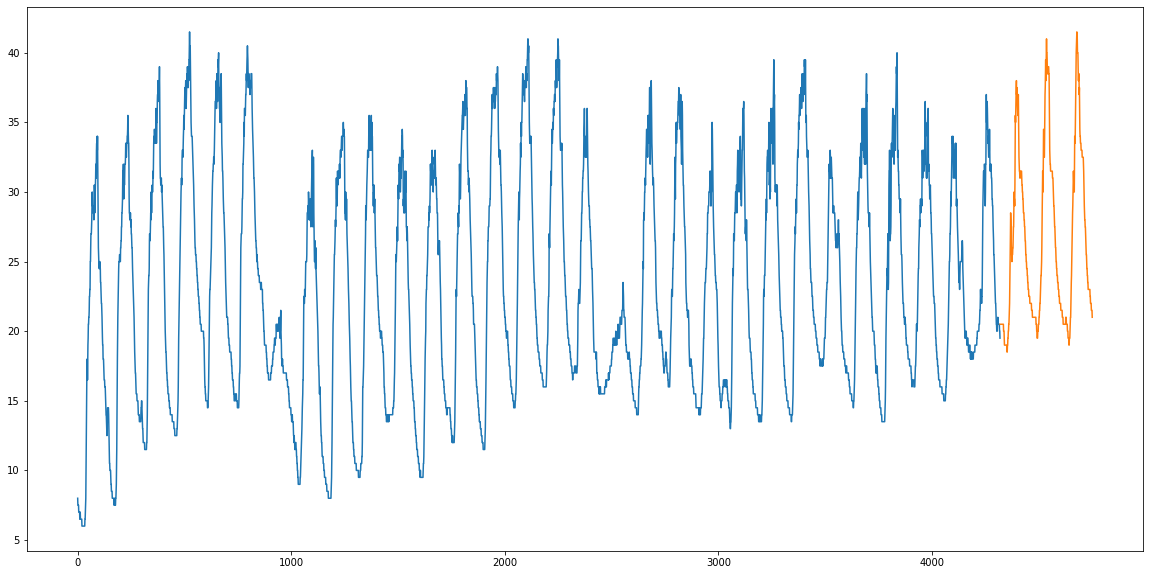

In [17]:
# 간편하게 타겟 변수를 만들기 위해 Y00 부터 Y17까지의 평균값과 Y18 값을 이어주는 방법으로 타겟변수를 만듦
plt.figure(figsize=(20,10))
my_Y = train.loc[:, "Y16"] #Y16값
plt.plot(my_Y) #위에서 구한 온도(mean_temp)의 선그래프 플롯팅
plt.plot(train["Y18"])

In [0]:
df = train

In [0]:
#Y18이 결측값이 아니면 Y18을 그대로 사용하고 결측값이면 Y17을 Y18로 채워넣음
df['Y18'] = np.where(pd.notnull(df['Y18']) == True, df['Y18'], df['Y17'])

In [0]:
train = df

In [21]:
train.head() #Y18 결측값 채워졌는지 확인

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,wind_direction
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,9.0,East
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,9.0,North
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,8.5,North
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,8.5,West
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,8.5,North


In [0]:
#고장나서 0만 출력하는 관측소 데이터를 컬럼에서 삭제해주는 함수
def same_min_max(df):
    return df.drop(df.columns[df.max() == df.min()], axis=1) #최소값과 최대값이 같으면 삭제

train_new = same_min_max(train)
test_new  = same_min_max(test)
#결과: x14, x16, x19가 삭제되어 train_new, test_new 생성됨

In [24]:
#기온 변수 temp를 만듦
train_new['temp'] = (train_new['X00']+train_new['X07']+train_new['X28']+train_new['X31']+train_new['X32'])/5
test_new['temp'] = (test_new['X00']+test_new['X07']+test_new['X28']+test_new['X31']+test_new['X32'])/5
train_new.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,wind_direction,temp
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,101.1,56.1,0.3,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,9.0,East,10.62
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,165.3,0.0,0.4,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,9.0,North,10.42
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,144.0,0.0,0.6,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,8.5,North,10.26
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,115.9,294.1,0.1,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,8.5,West,10.12
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,124.7,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,8.5,North,10.00


In [25]:
#기온 변수 temp 만들었으므로 기온관련 변수 삭제
train_new = train_new.drop(temperature_name, axis=1)
test_new = test_new.drop(temperature_name, axis=1)
train_new.head()

,id,X01,X02,X03,X04,X05,X06,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X29,X30,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,wind_direction,temp
0,0,988.8,1.2,0.6,0.0,1009.3,989.6,1009.9,1009.8,0.0,0.0,82.4,71.3,101.1,56.1,0.3,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,1001.6,69.1,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,9.0,East,10.62
1,1,988.9,1.7,1.9,0.0,1009.3,989.6,1010.0,1009.9,0.0,0.0,81.2,121.8,165.3,0.0,0.4,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,1001.7,70.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,9.0,North,10.42
2,2,989.0,1.1,2.3,0.0,1009.2,989.7,1010.1,1010.1,0.0,0.0,86.1,232.0,144.0,0.0,0.6,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,1001.6,71.5,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,8.5,North,10.26
3,3,988.9,1.5,0.7,0.0,1009.2,989.6,1010.0,1010.0,0.0,0.0,87.7,0.0,115.9,294.1,0.1,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,1001.5,73.2,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,8.5,West,10.12
4,4,988.9,0.8,1.7,0.0,1009.2,989.7,1010.1,1010.0,0.0,0.0,88.9,0.0,124.7,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,1001.5,74.3,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,8.5,North,10.00


In [0]:
#기압 관련 변수 정리: 현지기압관련변수 모두와 해면기압 X09제외한 모든 변수 삭제
train_new = train_new.drop(localpress_name, axis=1)
test_new = test_new.drop(localpress_name, axis=1)
train_new = train_new.drop(['X05', 'X08', 'X23', 'X33'], axis=1)
test_new = test_new.drop(['X05', 'X08', 'X23', 'X33'], axis=1)
#풍속 관련 변수 정리: X26 제외한 모든 변수 삭제
train_new = train_new.drop(['X02', 'X03', 'X18', 'X24'], axis=1)
test_new = test_new.drop(['X02', 'X03', 'X18', 'X24'], axis=1)
#일일누적강수 관련 변수 정리: X04 제외한 모든 변수 삭제
train_new = train_new.drop(['X10', 'X21', 'X36', 'X39'], axis=1)
test_new = test_new.drop(['X10', 'X21', 'X36', 'X39'], axis=1)
#일일누적일사량 변수 생성
train_new['sun']=(train_new['X11'] + train_new['X34'])/2
test_new['sun']=(test_new['X11'] + test_new['X34'])/2

In [0]:
#일일누적일사량관련 변수 정리
train_new = train_new.drop(['X11', 'X34'], axis=1)
test_new = test_new.drop(['X11','X34'], axis=1)
#습도 관련 변수 정리: X20 제외한 모든 변수 삭제
train_new = train_new.drop(['X12', 'X30', 'X37', 'X38'], axis=1)
test_new = test_new.drop(['X12', 'X30', 'X37', 'X38'], axis=1)

In [28]:
train_new.head()

,id,X04,X09,X13,X15,X17,X20,X25,X26,X35,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,wind_direction,temp,sun
0,0,0.0,1009.8,71.3,101.1,56.1,91.0,2.3,0.5,256.4,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,9.0,East,10.62,0.0
1,1,0.0,1009.9,121.8,165.3,0.0,91.9,0.0,0.0,215.4,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,9.0,North,10.42,0.0
2,2,0.0,1010.1,232.0,144.0,0.0,93.3,0.0,0.0,235.2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,8.5,North,10.26,0.0
3,3,0.0,1010.0,0.0,115.9,294.1,93.4,0.0,0.2,214.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,8.5,West,10.12,0.0
4,4,0.0,1010.0,0.0,124.7,0.0,94.1,0.0,0.0,174.9,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,8.5,North,10.00,0.0


In [29]:
test_new.head()

,id,X04,X09,X13,X15,X17,X20,X25,X26,X35,wind_direction,temp,sun
0,4752,0.0,1007.2,333.6,199.6,36.0,94.7,0.0,0.1,194.7,North,19.94,0.0
1,4753,0.0,1007.2,335.5,194.0,127.7,95.3,0.0,0.3,173.1,East,19.92,0.0
2,4754,0.0,1007.2,0.0,172.9,59.0,93.9,0.0,0.7,208.6,East,19.90,0.0
3,4755,0.0,1007.2,252.9,153.5,54.9,94.4,0.0,0.6,185.0,East,19.72,0.0
4,4756,0.0,1007.2,238.2,173.8,48.8,95.7,0.0,0.7,162.8,East,19.68,0.0


In [0]:
#라벨인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(train_new['wind_direction'])   #train['col']을 fit
train_new['wind_direction'] = le.transform(train_new['wind_direction'])
test_new['wind_direction'] = le.transform(test_new['wind_direction'])

In [0]:
# x벡터에 들어갈 변수명으로 X 만들기
X_names = train_new[['X04', 'X09', 'X20','X26','wind_direction', 'temp', 'sun']]

In [0]:
# y 변수명으로 y 변수만들기
y = train_new[['Y18']]

# Linear Regression으로 예측

In [33]:
#다중선형회귀
mlr = LinearRegression()
mlr.fit(X_names, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
x_test = test_new[['X04', 'X09', 'X20','X26','wind_direction', 'temp', 'sun']]

In [35]:
x_test

,X04,X09,X20,X26,wind_direction,temp,sun
0,0.0,1007.2,94.7,0.1,1,19.94,0.00
1,0.0,1007.2,95.3,0.3,0,19.92,0.00
2,0.0,1007.2,93.9,0.7,0,19.90,0.00
3,0.0,1007.2,94.4,0.6,0,19.72,0.00
4,0.0,1007.2,95.7,0.7,0,19.68,0.00
...,...,...,...,...,...,...,...
11515,0.0,1012.6,77.3,4.5,2,25.54,18.33
11516,0.0,1012.6,78.1,4.7,2,25.84,18.33
11517,0.0,1012.7,78.9,4.8,2,25.70,18.33
11518,0.0,1012.6,79.7,3.5,2,25.68,18.33


In [0]:
#test데이터로 예측
Y18_predicted = mlr.predict(x_test)

In [37]:
Y18_predicted

array([[21.14950425],
       [20.92533228],
       [21.22765077],
       ...,
       [29.57723335],
       [28.98982487],
       [28.73330176]])

In [0]:
submission =pd.DataFrame(data=Y18_predicted)

In [39]:
test_new.head()

,id,X04,X09,X13,X15,X17,X20,X25,X26,X35,wind_direction,temp,sun
0,4752,0.0,1007.2,333.6,199.6,36.0,94.7,0.0,0.1,194.7,1,19.94,0.0
1,4753,0.0,1007.2,335.5,194.0,127.7,95.3,0.0,0.3,173.1,0,19.92,0.0
2,4754,0.0,1007.2,0.0,172.9,59.0,93.9,0.0,0.7,208.6,0,19.90,0.0
3,4755,0.0,1007.2,252.9,153.5,54.9,94.4,0.0,0.6,185.0,0,19.72,0.0
4,4756,0.0,1007.2,238.2,173.8,48.8,95.7,0.0,0.7,162.8,0,19.68,0.0


In [40]:
#샘플submission파일 확인
pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIFrenz_Season1_dataset/sample_submission.csv')

,id,Y18
0,4752,0
1,4753,0
2,4754,0
3,4755,0
4,4756,0
...,...,...
11515,16267,0
11516,16268,0
11517,16269,0
11518,16270,0


In [0]:
test_id = test_new['id']
test_id = pd.DataFrame(test_id)

In [0]:
submission0406 = pd.concat([test_id, submission], axis=1)

In [0]:
submission0406.columns = ['id', 'Y18']

In [45]:
submission0406

,id,Y18
0,4752,21.149504
1,4753,20.925332
2,4754,21.227651
3,4755,20.864419
4,4756,20.661610
...,...,...
11515,16267,29.463836
11516,16268,29.855122
11517,16269,29.577233
11518,16270,28.989825


In [0]:
submission0406.to_csv('/content/drive/My Drive/Colab Notebooks/submission0406.csv', index = False)

#표준화하여 학습시켜보기

In [0]:
# 변수들 표준화하기
## 표준화 함수 생성
def standardization(df):
  mean = np.mean(df)
  std = np.std(df)
  norm = (df - mean)/ (std - 1e-07)
  return norm, mean, std

#X00부터 X39까지 이름만 X_name에 저장
X_name = train_new.loc[:, "X00":"X39"].columns
X_name

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X15', 'X17', 'X18', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39'],
      dtype='object')

In [0]:
#training data standardization
train_X_norm, mean, std = standardization(train_new[X_name])

#test data standardization
test_X_norm = (test_new[X_name] - mean) / (std - 1e-07)

In [0]:
#Concatenating of stadardized x variables and id column
train2 = pd.concat([train_new["id"], train_X_norm], axis = 1)
test2 = pd.concat([test_new["id"], test_X_norm], axis=1)

print("train2.shape:", train2.shape) #train셋의 행과 열 갯수 보기
print("test2.shape:", test2.shape) #test셋의 행과 열 갯수 보기

train2.shape: (4752, 38)
test2.shape: (11520, 38)


In [0]:
test2.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,-0.324597,-0.363472,-0.009111,-0.163620,-0.286772,-0.451855,-0.383472,-0.127510,-0.366580,-0.336784,-0.302862,-1.012516,1.252044,1.743749,0.258279,-1.085332,-0.240247,1.063816,-0.279106,-0.437489,-0.366078,-0.902731,-1.061634,-1.023467,-0.451211,0.265331,-0.387018,1.196016,-0.425120,-0.154235,-0.428667,-1.015988,-0.137597,-0.274975,0.926050,0.093720,-0.234601
1,4753,-0.303353,-0.363472,-0.382334,-0.270451,-0.286772,-0.481312,-0.383472,-0.104662,-0.366580,-0.336784,-0.302862,-1.012516,1.256533,1.762984,0.201005,-0.294346,-0.673184,1.091303,-0.279106,-0.467185,-0.395341,-0.902731,-1.061634,-0.862277,-0.480229,0.241661,-0.416518,1.205308,-0.443237,-0.173206,-0.457735,-1.015988,-0.354529,-0.274975,0.926050,0.126389,-0.234601
2,4754,-0.260864,-0.363472,-0.195722,-0.270451,-0.286772,-0.510770,-0.412855,-0.104662,-0.394989,-0.336784,-0.302862,-1.012516,1.265512,-1.633554,-0.014796,-0.886939,-1.192709,1.027166,-0.279106,-0.496882,-0.424604,-0.902731,-1.061634,-0.539896,-0.480229,0.241661,-0.446017,1.223892,-0.479471,-0.192178,-0.457735,-1.015988,0.002004,-0.274975,0.977266,0.142723,-0.234601


In [0]:
## 변수 컬럼 대폭 줄여서 데이터프레임 생성
simple_train = train2[['temp',]]
simple_test = test2[['temp',]]
simple_all = pd.concat([simple_train,simple_test], sort=False)

In [0]:
test2.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,temp
0,4752,-0.324597,-0.363472,-0.009111,-0.163620,-0.286772,-0.451855,-0.383472,-0.127510,-0.366580,-0.336784,-0.302862,-1.012516,1.252044,1.743749,0.258279,-1.085332,-0.240247,1.063816,-0.279106,-0.437489,-0.366078,-0.902731,-1.061634,-1.023467,-0.451211,0.265331,-0.387018,1.196016,-0.425120,-0.154235,-0.428667,-1.015988,-0.137597,-0.274975,0.926050,0.093720,-0.234601,-0.153226
1,4753,-0.303353,-0.363472,-0.382334,-0.270451,-0.286772,-0.481312,-0.383472,-0.104662,-0.366580,-0.336784,-0.302862,-1.012516,1.256533,1.762984,0.201005,-0.294346,-0.673184,1.091303,-0.279106,-0.467185,-0.395341,-0.902731,-1.061634,-0.862277,-0.480229,0.241661,-0.416518,1.205308,-0.443237,-0.173206,-0.457735,-1.015988,-0.354529,-0.274975,0.926050,0.126389,-0.234601,-0.156560
2,4754,-0.260864,-0.363472,-0.195722,-0.270451,-0.286772,-0.510770,-0.412855,-0.104662,-0.394989,-0.336784,-0.302862,-1.012516,1.265512,-1.633554,-0.014796,-0.886939,-1.192709,1.027166,-0.279106,-0.496882,-0.424604,-0.902731,-1.061634,-0.539896,-0.480229,0.241661,-0.446017,1.223892,-0.479471,-0.192178,-0.457735,-1.015988,0.002004,-0.274975,0.977266,0.142723,-0.234601,-0.159103
3,4755,-0.324597,-0.363472,0.737335,-0.697778,-0.286772,-0.510770,-0.412855,-0.127510,-0.394989,-0.336784,-0.302862,-1.012516,1.270001,0.926757,-0.213209,-0.922305,-0.846359,1.050072,-0.279106,-0.496882,-0.424604,-0.902731,-1.061634,-0.620491,-0.509248,0.170651,-0.446017,1.270353,-0.479471,-0.230121,-0.486802,-1.015988,-0.235015,-0.274975,1.018239,0.164502,-0.234601,-0.198210
4,4756,-0.388331,-0.363472,-0.382334,-0.804610,-0.286772,-0.481312,-0.383472,-0.173206,-0.366580,-0.336784,-0.302862,-1.012516,1.274490,0.777937,-0.005591,-0.974922,-0.500009,1.109628,-0.279106,-0.467185,-0.453867,-0.902731,-1.061634,-0.539896,-0.480229,0.170651,-0.475517,1.237830,-0.443237,-0.211149,-0.457735,-1.015988,-0.457974,-0.274975,1.095063,0.191725,-0.234601,-0.209055


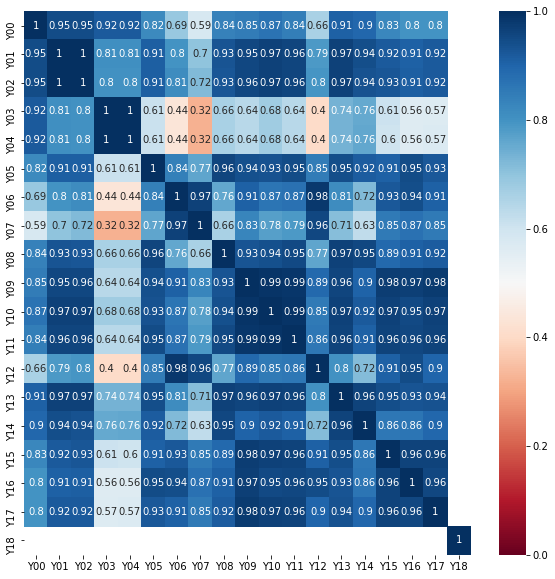

In [0]:
#Y에 대한 상관계수 데이터프레임 생성
train_corr = train.loc[:,"Y00":"Y18"].corr()
#출력 크기조절
plt.figure(figsize=(10,10))
#히트맵 정의
ax = sns.heatmap(train_corr, cmap = "RdBu", annot = True,vmin=0, vmax=1) 
#y축 잘림 방지
ax.set_ylim(len(train_corr.columns),0) 
#출력
plt.show()

In [0]:
#Time variable Creation
minute = (train.id%144).astype(int)
minute
hour= pd.Series((train.index%144/6).astype(int))
hour

0        0
1        0
2        0
3        0
4        0
        ..
4747    23
4748    23
4749    23
4750    23
4751    23
Length: 4752, dtype: int64

In [0]:
min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
minute_cos = np.cos(np.pi*minute/min_in_day)

hour_sin  = np.sin(np.pi*hour/hour_in_day)
hour_cos  = np.cos(np.pi*hour/hour_in_day)

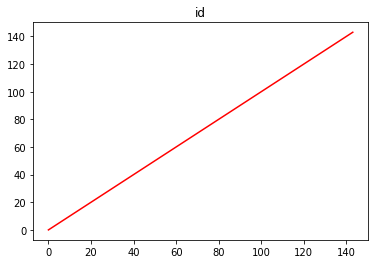

In [0]:
t1 = range(len(train.id[:144]))
plt.plot(t1, train.id[:144], 'r-')
plt.title("id")
plt.show()

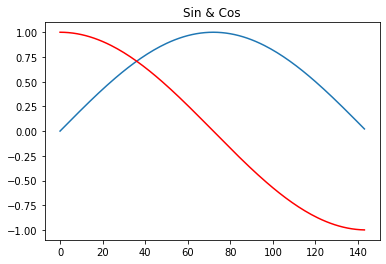

In [0]:
t1 = range(len(minute_sin[:144]))
plt.plot(t1, minute_sin[:144], 
         t1, minute_cos[:144], 'r-')
plt.title("Sin & Cos")
plt.show()
#따라서, 추후 모델링 할 때, hour_sin, hour_cos, minute_sin, minute_cos 사용 가능